In [1]:
import numpy as np
import math

**Question01**

In [2]:
def power_method(matrix, max_iterations=1000, tolerance=1e-6):
    n = len(matrix)
    x = np.ones(n)  # Initial guess for the eigenvector
    eigenvalue_old = 0

    for _ in range(max_iterations):
        x = np.dot(matrix, x)
        eigenvalue = np.max(x)
        x = x / eigenvalue  # Normalize the eigenvector

        if np.abs(eigenvalue - eigenvalue_old) < tolerance:
            break

        eigenvalue_old = eigenvalue

    return eigenvalue, x

In [40]:
def power_method2(matrix, max_iterations=1000, tolerance=1e-6):
    n = len(matrix)
    x = np.ones(n)  # Initial guess for the eigenvector
    eigenvalue_old = 0

    for _ in range(max_iterations):
        x = np.dot(matrix, x)
        eigenvalue = np.linalg.norm(x)
        x = x / eigenvalue  # Normalize the eigenvector

        if np.abs(eigenvalue - eigenvalue_old) < tolerance:
            break

        eigenvalue_old = eigenvalue

    return eigenvalue, x

In [3]:
def generate_symmetric_matrix(n):
    upper_triangular = np.random.rand(n, n)
    symmetric_matrix = np.triu(upper_triangular) + np.triu(upper_triangular, 1).T
    return symmetric_matrix

In [13]:
#1
A = np.array([[8,-6,2],[-6,7,-4],[2,-4,3]])
eigenval,eigenvector=power_method(A)
print("eigen value ",eigenval)
print("eigen vector ",eigenvector)
eigenval,eigenvector=np.linalg.eig(A)
print("actual eigen value ",max(eigenval))
print("actual eigen vector ",eigenvector[:,np.argmax(eigenval)])

#2
A=generate_symmetric_matrix(4)
# print(A)
eigenval,eigenvector=power_method(A)
print("eigen value ",eigenval)
print("eigen vector ",eigenvector)
eigenval,eigenvector=np.linalg.eig(A)
print("actual eigen value ",max(eigenval))
print("actual eigen vector ",eigenvector[:,np.argmax(eigenval)])


eigen value  14.999999754240006
eigen vector  [ 1.         -0.99999999  0.49999999]
eigen value  15.000000000000007
eigen vector  [-0.66666667  0.66666667 -0.33333333]
eigen value  2.178541738132502
eigen vector  [0.89032179 1.         0.67333813 0.32257778]
eigen value  2.178541804401368
eigen vector  [0.58076786 0.65231232 0.43922676 0.21042147]


In [41]:
#1
A = np.array([[8,-6,2],[-6,7,-4],[2,-4,3]])
eigenval,eigenvector=power_method2(A)
print("eigen value ",eigenval)
print("eigen vector ",eigenvector)
eigenval,eigenvector=np.linalg.eig(A)
print("actual eigen value ",max(eigenval))
print("actual eigen vector ",eigenvector[:,np.argmax(eigenval)])

#2
A=generate_symmetric_matrix(4)
# print(A)
eigenval,eigenvector=power_method2(A)
print("eigen value ",eigenval)
print("eigen vector ",eigenvector)
eigenval,eigenvector=np.linalg.eig(A)
print("actual eigen value ",max(eigenval))
print("actual eigen vector ",eigenvector[:,np.argmax(eigenval)])

eigen value  14.9999999705088
eigen vector  [ 0.6666752 -0.6666624  0.3333248]
actual eigen value  15.000000000000007
actual eigen vector  [-0.66666667  0.66666667 -0.33333333]
eigen value  1.986091207721367
eigen vector  [0.61189967 0.36601553 0.58112364 0.39230949]
actual eigen value  1.9860912303172575
actual eigen vector  [0.61189831 0.36597559 0.58115298 0.39230541]


**Question 02**


In [15]:
# Step 1: Construct the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 1, 1, 1],
                             [0, 0, 1, 1, 0, 0],
                             [0, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 1, 0],
                             [1, 0, 0, 1, 0, 0],
                             [0, 0, 0, 0, 1, 0]])

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_eigenvalue_index]

print(abs(max_eigenvector))

[0.68439093 0.27639155 0.26247815 0.26247815 0.49853028 0.26247815]


In [18]:
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix.T)
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_eigenvalue_index]

print(abs(max_eigenvector))

[0.34315773 0.18067389 0.09512551 0.61895714 0.65176672 0.18067389]


from this info we can find which is most easy to access and page where we can access most pages

**Question03**

In [28]:
a, b, c = 1, 1, 1 
def f(x):
    global a,b,c
    return a * x**2 + b * x + c

def gradf(x):
    global a,b
    return 2*a*x+b

def gradient_descent(initial_x):
    global a,b,c
    learning_rate=0.01
    x = initial_x
    no_of_itt=0
    x0=x
    while True:
        x = x - learning_rate * gradf(x)
        no_of_itt+=1
        if(abs(x-x0)<0.01 or no_of_itt>1000):
            break
        x0=x
    return x,no_of_itt

def gradient_descent_L1(initial_x,lm):
    global a,b,c
    learning_rate=0.01
    x = initial_x
    no_of_itt=0
    x0=x
    while True:
        x = x - learning_rate * (gradf(x)+lm*np.sign(x))
        no_of_itt+=1
        if(abs(x-x0)<0.01 or no_of_itt>1000):
            break
        x0=x
    return x,no_of_itt

def gradient_descent_L2(initial_x,lm):
    global a,b,c
    learning_rate=0.01
    x = initial_x
    no_of_itt=0
    x0=x
    while True:
        x = x - learning_rate * (gradf(x)+2*lm*x)
        no_of_itt+=1
        if(abs(x-x0)<0.01 or no_of_itt>1000):
            break
        x0=x
    return x,no_of_itt

x,itt=gradient_descent(5)
print("x ",x)
print("f(x)=",f(x))
print("ittretion ",itt)

x,itt=gradient_descent_L1(5,0.1)
print("x ",x)
print("f(x)=",f(x))
print("ittretion ",itt)

x,itt=gradient_descent_L2(5,0.1)
print("x ",x)
print("f(x)=",f(x))
print("ittretion ",itt)

x  -0.013041700007233556
f(x)= 0.9871283859318452
ittretion  120
x  -0.015256985942506676
f(x)= 0.9849757896775432
ittretion  116
x  -0.012925024598880218
f(x)= 0.9872420316620014
ittretion  113


In [36]:
x=np.array([i/100 for i in range(10)])
y=np.array([gradient_descent_L1(5,i)[1] for i in x])

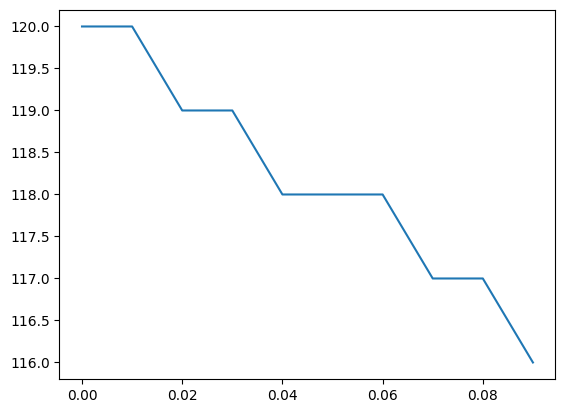

In [37]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [38]:
x=np.array([i/100 for i in range(10)])
y=np.array([gradient_descent_L2(5,i)[1] for i in x])

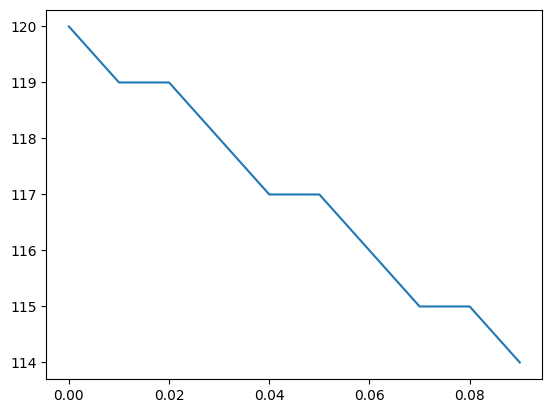

In [39]:
plt.plot(x,y)